In [1]:
import pandas as pd
import numpy as np
import re
from pathlib import Path
import json
import seaborn as sns
from collections import Counter

In [2]:
%cd /Users/kelsey/yelp

/Users/kelsey/yelp


In [3]:
# downloaded this from kaggle
yelp = pd.read_csv("yelp_review.csv")

In [4]:
counter_star = Counter(yelp['stars'])
min_class = -1
min_amount = 1000000000
for cs in counter_star:
    if min_amount > counter_star[cs]:
        min_amount = counter_star[cs]
        min_class = cs
remove_amounts = {c: abs(min_amount - counter_star[c]) for c in counter_star}
remove_amounts[1] -= 1
drop_indices = []
for index, row in yelp.iterrows():
    if remove_amounts[row['stars']] > 0:
        remove_amounts[row['stars']] -= 1
        drop_indices.append(index)

yelp = yelp.drop(drop_indices)

/Users/kelsey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stars', ylabel='count'>

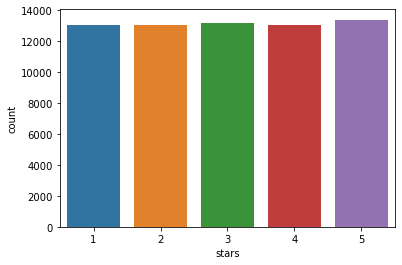

In [5]:
yelp = yelp.sample(frac = 0.03, replace = False)
sns.countplot(yelp['stars'])

In [6]:
# data cleaning advice from: https://towardsdatascience.com/text-cleaning-methods-for-natural-language-processing-f2fc1796e8c7

def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return df

yelp = clean_text(yelp, 'text', 'text_clean')

In [7]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
yelp['text_clean'] = yelp['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kelsey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
yelp.to_csv("yelp_clean.csv")